### Minimal example with TensorFlow 2.0

In this notebook we will recreate our machine learning algorithm using TF 2.0

#### Import the relevant libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Data generation

In [9]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets) # saving the data into a n-dimensional array, for TensorFlow

#### Solving with TensorFlow

In [10]:
training_data = np.load('TF_intro.npz')

In [11]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                            kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                            bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 32.5909
Epoch 2/100
32/32 - 0s - loss: 1.2218
Epoch 3/100
32/32 - 0s - loss: 0.4862
Epoch 4/100
32/32 - 0s - loss: 0.3961
Epoch 5/100
32/32 - 0s - loss: 0.4069
Epoch 6/100
32/32 - 0s - loss: 0.3860
Epoch 7/100
32/32 - 0s - loss: 0.4221
Epoch 8/100
32/32 - 0s - loss: 0.3886
Epoch 9/100
32/32 - 0s - loss: 0.4052
Epoch 10/100
32/32 - 0s - loss: 0.3924
Epoch 11/100
32/32 - 0s - loss: 0.3861
Epoch 12/100
32/32 - 0s - loss: 0.3934
Epoch 13/100
32/32 - 0s - loss: 0.5254
Epoch 14/100
32/32 - 0s - loss: 0.3740
Epoch 15/100
32/32 - 0s - loss: 0.4172
Epoch 16/100
32/32 - 0s - loss: 0.3821
Epoch 17/100
32/32 - 0s - loss: 0.3530
Epoch 18/100
32/32 - 0s - loss: 0.4043
Epoch 19/100
32/32 - 0s - loss: 0.5369
Epoch 20/100
32/32 - 0s - loss: 0.3710
Epoch 21/100
32/32 - 0s - loss: 0.3835
Epoch 22/100
32/32 - 0s - loss: 0.4035
Epoch 23/100
32/32 - 0s - loss: 0.3806
Epoch 24/100
32/32 - 0s - loss: 0.3889
Epoch 25/100
32/32 - 0s - loss: 0.3842
Epoch 26/100
32/32 - 0s - loss: 0

### Extract the weights and biases

In [12]:
model.layers[0].get_weights()

[array([[ 2.0232217],
        [-2.8783722]], dtype=float32),
 array([5.025655], dtype=float32)]

In [13]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0232217],
       [-2.8783722]], dtype=float32)

In [14]:
biases = model.layers[0].get_weights()[1]
biases

array([5.025655], dtype=float32)

### Extract the outputs (make predictions)

In [15]:
model.predict_on_batch(training_data['inputs'])

array([[-1.01690998e+01],
       [ 1.57828350e+01],
       [-6.83108425e+00],
       [-4.74123287e+00],
       [ 2.76956177e+01],
       [-3.47417793e+01],
       [ 2.00847549e+01],
       [-7.54205608e+00],
       [-2.24747353e+01],
       [-2.74291763e+01],
       [-1.30176172e+01],
       [-3.08870792e-01],
       [ 1.29428654e+01],
       [ 2.72695808e+01],
       [-1.49502878e+01],
       [ 7.48608971e+00],
       [ 5.62530470e+00],
       [ 3.42264671e+01],
       [ 1.58454905e+01],
       [ 2.22749519e+01],
       [ 2.09276733e+01],
       [-4.16758633e+00],
       [-1.67443390e+01],
       [-9.95453358e+00],
       [ 1.31636877e+01],
       [ 2.38340569e+00],
       [ 4.74366283e+00],
       [-1.88527107e-01],
       [ 1.22544527e+01],
       [-2.88716927e+01],
       [-2.29092407e+01],
       [-2.46955948e+01],
       [ 1.04214191e+01],
       [-1.61216507e+01],
       [-7.87712002e+00],
       [ 6.60224056e+00],
       [ 2.33012161e+01],
       [ 1.45056868e+01],
       [ 2.1

In [16]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-10.2],
       [ 15.8],
       [ -6.8],
       [ -4.7],
       [ 27.7],
       [-34.7],
       [ 20.1],
       [ -7.5],
       [-22.5],
       [-27.4],
       [-13. ],
       [ -0.3],
       [ 12.9],
       [ 27.3],
       [-15. ],
       [  7.5],
       [  5.6],
       [ 34.2],
       [ 15.8],
       [ 22.3],
       [ 20.9],
       [ -4.2],
       [-16.7],
       [-10. ],
       [ 13.2],
       [  2.4],
       [  4.7],
       [ -0.2],
       [ 12.3],
       [-28.9],
       [-22.9],
       [-24.7],
       [ 10.4],
       [-16.1],
       [ -7.9],
       [  6.6],
       [ 23.3],
       [ 14.5],
       [ 21.1],
       [-15. ],
       [-13. ],
       [-21.3],
       [ 29.5],
       [ 27. ],
       [ 14.9],
       [-14.9],
       [ 11.5],
       [  9.6],
       [ 13. ],
       [-17.4],
       [ 33.1],
       [-13.6],
       [ 45.7],
       [ 28.9],
       [  5.8],
       [  6.5],
       [  2.8],
       [ 33.8],
       [ 22.7],
       [ 26.3],
       [  5.5],
       [  2. ],
       [

In [17]:
training_data['targets'].round(1)

array([[-11. ],
       [ 15.4],
       [ -7.4],
       [ -5.4],
       [ 28.6],
       [-36.1],
       [ 19.6],
       [ -7.5],
       [-22.7],
       [-28.4],
       [-14.5],
       [ -0.2],
       [ 13.1],
       [ 28.5],
       [-14.2],
       [  8.4],
       [  5.4],
       [ 34.7],
       [ 14.5],
       [ 22. ],
       [ 21.9],
       [ -3.7],
       [-17.3],
       [-10.1],
       [ 14. ],
       [  4. ],
       [  3.3],
       [ -0.7],
       [ 12.2],
       [-28.5],
       [-24.3],
       [-26.5],
       [  9.7],
       [-17.2],
       [ -9.8],
       [  7.1],
       [ 23.5],
       [ 15.2],
       [ 20.5],
       [-15.7],
       [-13.5],
       [-22.6],
       [ 29.4],
       [ 26.6],
       [ 14.8],
       [-15.2],
       [ 10.4],
       [  8.6],
       [ 15.1],
       [-18.4],
       [ 33.6],
       [-13.4],
       [ 47.6],
       [ 29.8],
       [  6.7],
       [  6.4],
       [  2.3],
       [ 33.5],
       [ 23.1],
       [ 26.8],
       [  5. ],
       [  2.4],
       [

### Plotting the data

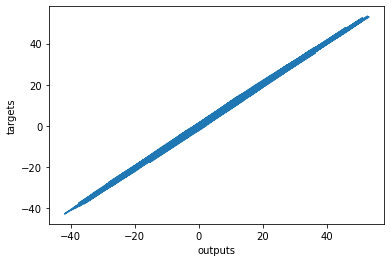

In [18]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show() # if the line is close to 45 degrees, it means the outputs and the targets are close to each other.